In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 32.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=abbe5d2cdcd28e7908b4d0d6842c50113bdf86fd8772ab1e799d0fd0f73d0352
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


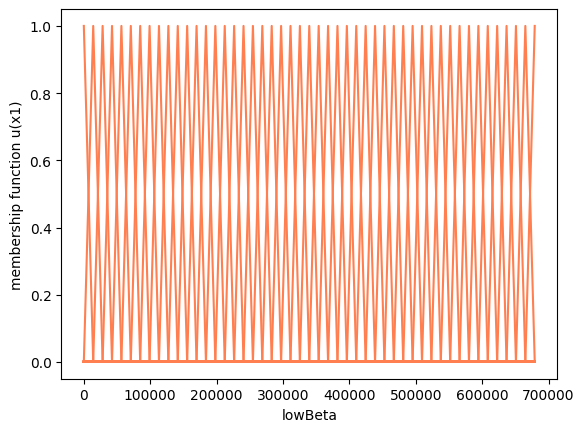

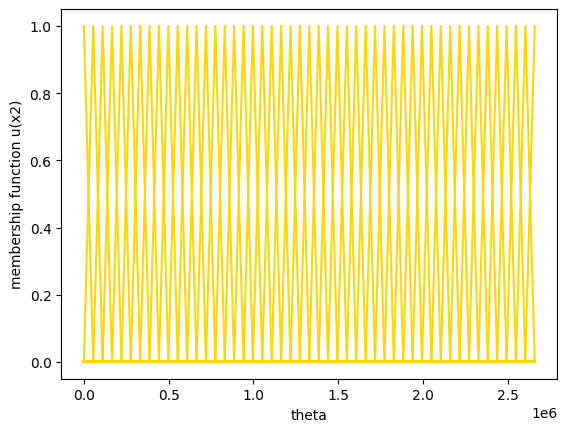

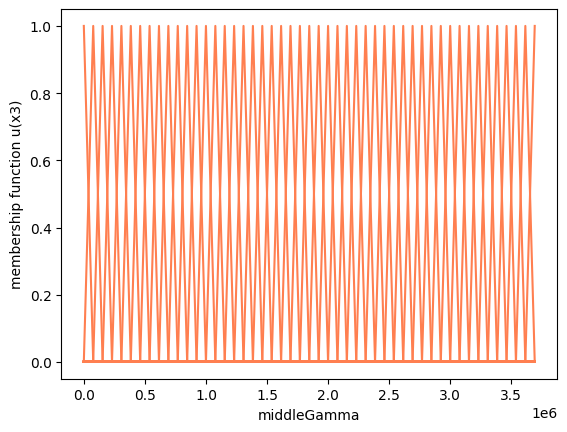

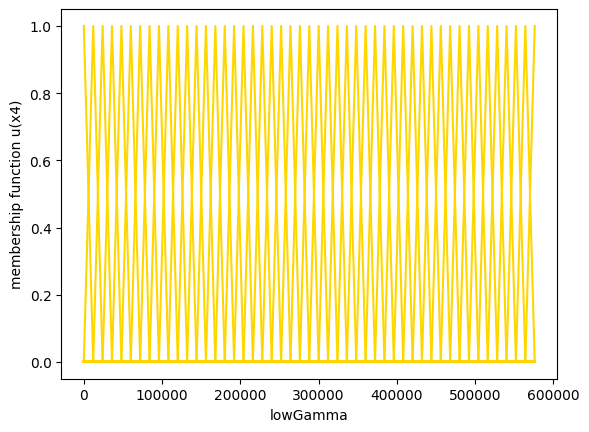

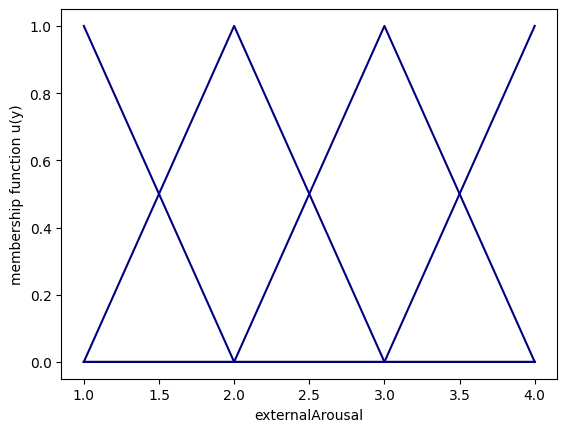

45408 primitive rules
5774 non conflict and non duplicate rule
       0   1   2   3  4         5
0      0   0   0   0  1  0.999830
1      3   5  28   2  1  0.898612
2      4   5   5   2  2  0.893828
3      6  15  11   2  3  0.875157
4      2   2  13   2  2  0.870890
...   ..  ..  ..  .. ..       ...
5769   4   3  12   4  2  0.082790
5770   4   6  16   5  2  0.080161
5771   0   2   0   2  3  0.077327
5772   4  10  14   5  2  0.076089
5773  17   9  15  30  2  0.071315

[5774 rows x 6 columns]


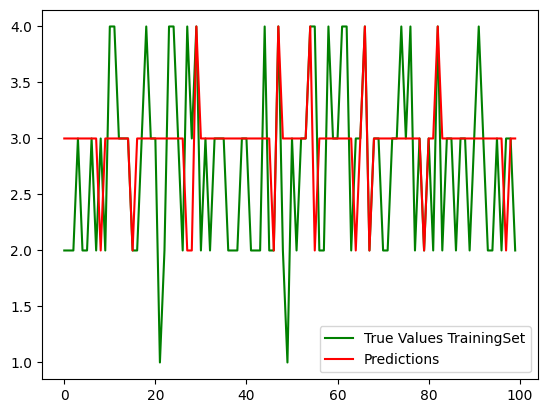

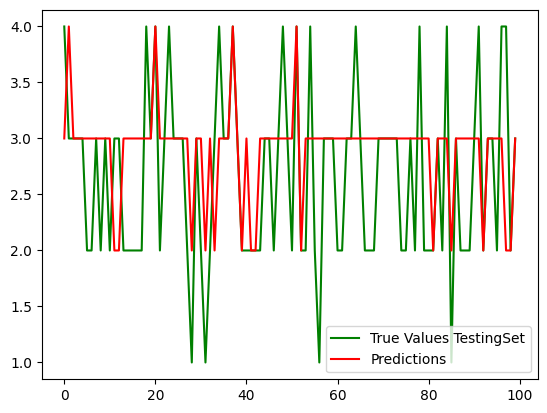

Accuracy training test:
0.45
Accuracy testing test:
0.46


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from pandas import read_csv
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

class WangMendel():

    def __init__(self, X1, X2, X3, X4, Y, n_mf_input, n_mf_output):
        self.X1 = X1
        self.X2 = X2
        self.X3 = X3
        self.X4 = X4
        self.Y = Y

        self.X1_range = np.linspace(min(X1), max(X1), n_mf_input)
        self.X2_range = np.linspace(min(X2), max(X2), n_mf_input)
        self.X3_range = np.linspace(min(X3), max(X3), n_mf_input)
        self.X4_range = np.linspace(min(X4), max(X4), n_mf_input)
        self.Y_range = np.linspace(min(Y), max(Y), n_mf_output)

    def generate_mf(self):
        self.X1_mf = []
        self.X2_mf = []
        self.X3_mf = []
        self.X4_mf = []
        self.Y_mf = []
        self.center = []

        self.X1_mf.append(fuzz.trimf(self.X1_range, [self.X1_range[0], self.X1_range[0], self.X1_range[1]]))
        self.X1_mf.append(fuzz.trimf(self.X1_range, [self.X1_range[-2], self.X1_range[-1], self.X1_range[-1]]))
        for i in range(len(self.X1_range) - 2):
            self.X1_mf.append(fuzz.trimf(self.X1_range, [self.X1_range[i], self.X1_range[i+1], self.X1_range[i+2]]))

        self.X2_mf.append(fuzz.trimf(self.X2_range, [self.X2_range[0], self.X2_range[0], self.X2_range[1]]))
        self.X2_mf.append(fuzz.trimf(self.X2_range, [self.X2_range[-2], self.X2_range[-1], self.X2_range[-1]]))
        for i in range(len(self.X2_range) - 2):
            self.X2_mf.append(fuzz.trimf(self.X2_range, [self.X2_range[i], self.X2_range[i+1], self.X2_range[i+2]]))

        self.X3_mf.append(fuzz.trimf(self.X3_range, [self.X3_range[0], self.X3_range[0], self.X3_range[1]]))
        self.X3_mf.append(fuzz.trimf(self.X3_range, [self.X3_range[-2], self.X3_range[-1], self.X3_range[-1]]))
        for i in range(len(self.X3_range) - 2):
            self.X3_mf.append(fuzz.trimf(self.X3_range, [self.X3_range[i], self.X3_range[i+1], self.X3_range[i+2]]))

        self.X4_mf.append(fuzz.trimf(self.X4_range, [self.X4_range[0], self.X4_range[0], self.X4_range[1]]))
        self.X4_mf.append(fuzz.trimf(self.X4_range, [self.X4_range[-2], self.X4_range[-1], self.X4_range[-1]]))
        for i in range(len(self.X4_range) - 2):
            self.X4_mf.append(fuzz.trimf(self.X4_range, [self.X4_range[i], self.X4_range[i+1], self.X4_range[i+2]]))

        self.Y_mf = []
        self.center = []

        for y_value in range(1, 5):
            mf = fuzz.trimf(self.Y_range, [y_value-1, y_value, y_value+1 ])
            self.Y_mf.append(mf)
            self.center.append(y_value)


    def plot_mf(self):
        # plot X1
        for i in self.X1_mf:
            plt.plot(self.X1_range, i, color='coral')
        plt.xlabel('lowBeta')
        plt.ylabel('membership function u(x1)')
        plt.show()
        # plot X2
        for i in self.X2_mf:
            plt.plot(self.X2_range, i, color='gold')
        plt.xlabel('theta')
        plt.ylabel('membership function u(x2)')
        plt.show()
        # plot X3
        for i in self.X3_mf:
            plt.plot(self.X3_range, i, color='coral')
        plt.xlabel('middleGamma')
        plt.ylabel('membership function u(x3)')
        plt.show()
        # plot X4
        for i in self.X4_mf:
            plt.plot(self.X4_range, i, color='gold')
        plt.xlabel('lowGamma')
        plt.ylabel('membership function u(x4)')
        plt.show()

        # plot Y
        for i in self.Y_mf:
            plt.plot(self.Y_range, i, color='navy')
        plt.xlabel('externalArousal')
        plt.ylabel('membership function u(y)')
        plt.show()

    def generate_rule(self):
        rules = []
        for i in range(len(self.X1)):
            list_X1, list_X2, list_X3, list_X4, list_Y = [], [], [], [], []
            for j in range(len(self.X1_mf)):
                list_X1.append(fuzz.interp_membership(self.X1_range, self.X1_mf[j], self.X1[i]))
            for j in range(len(self.X2_mf)):
                list_X2.append(fuzz.interp_membership(self.X2_range, self.X2_mf[j], self.X2[i]))
            for j in range(len(self.X3_mf)):
                list_X3.append(fuzz.interp_membership(self.X3_range, self.X3_mf[j], self.X3[i]))
            for j in range(len(self.X4_mf)):
                list_X4.append(fuzz.interp_membership(self.X4_range, self.X4_mf[j], self.X4[i]))
            for j in range(len(self.Y_mf)):
                list_Y.append(fuzz.interp_membership(self.Y_range, self.Y_mf[j], self.Y[i]))

            x1_max, x2_max, x3_max, x4_max, y_max = np.argmax(list_X1), np.argmax(list_X2), np.argmax(list_X3), np.argmax(list_X4), np.argmax(list_Y)
            degree = list_X1[x1_max] * list_X2[x2_max] * list_X3[x3_max] * list_X4[x4_max] * list_Y[y_max]
            rules.append([x1_max, x2_max, x3_max, x4_max, y_max, degree])

        print(f'{len(rules)} primitive rules')

        # Remove duplicates and conflicts rules
        rules.sort(key = lambda rules : rules[5], reverse=True)

        #rimuovo i diplicati
        f_rule = []
        alternative = []
        # -1 for drop degree of rule
        alternative.append(rules[0][0:-1])
        f_rule.append(rules[0])
        for i in rules[1:]:
            a = i[0]
            b = i[1]
            c = i[2]
            d = i[3]
            e = i[4]
            f = i[5]
            if [a, b, c, d, e] in alternative:
                continue
            elif [a, b, c, d, e]not in alternative:
                alternative.append(i[0:-1])
                f_rule.append(i)

        #rimuovo conflitti
        self.f_rules = []
        self.f_rules.append(f_rule[0])
        antecedent = []
        antecedent.append(f_rule[0][0:-4])
        for i in f_rule[1:]:
            a = i[0]
            b = i[1]
            c = i[2]
            d = i[3]
            e = i[4]
            f = i[5]
            if [a, b, c, d] in antecedent:
                continue
            elif [a, b, c, d] not in antecedent:
                self.f_rules.append(i)
                antecedent.append(i[0:-4])
        print(f'{len(self.f_rules)} non conflict and non duplicate rule' )
        print(pd.DataFrame(self.f_rules))

    def inference(self, X1, X2, X3, X4, Y):
        f_rule = np.array(self.f_rules, dtype=int)
        Y_predict = []

        for i in range(len(X1)):
            list_X1, list_X2, list_X3, list_X4  = [], [], [], []
            for j in range(len(self.X1_mf)):
                list_X1.append(fuzz.interp_membership(self.X1_range, self.X1_mf[j], X1[i]))
            for j in range(len(self.X2_mf)):
                list_X2.append(fuzz.interp_membership(self.X2_range, self.X2_mf[j], X2[i]))
            for j in range(len(self.X3_mf)):
                list_X3.append(fuzz.interp_membership(self.X3_range, self.X3_mf[j], X3[i]))
            for j in range(len(self.X4_mf)):
                list_X4.append(fuzz.interp_membership(self.X4_range, self.X4_mf[j], X4[i]))

            num, den = 0, 0
            for i in range(len(f_rule)):
                num += list_X1[f_rule[i][0]] * list_X2[f_rule[i][1]] * list_X3[f_rule[i][2]] * list_X4[f_rule[i][3]] * self.center[f_rule[i][4]]
                den += list_X1[f_rule[i][0]] * list_X2[f_rule[i][1]] * list_X3[f_rule[i][2]] * list_X4[f_rule[i][3]]
            if den == 0:
                Y_predict.append(0)
            else:
                Y_predict.append(round(num/den,0))
        return Y_predict

N_in = 24
N_out = 4

data = read_csv('/content/drive/Shareddrives/Di Ricco_Barbieri_Cavedoni/whole_data_15.csv')

data = data.sample(frac=1, random_state=random.seed())
training_data, testing_data, training_labels, testing_labels = train_test_split(data.iloc[:, 7:len(data.columns)], data.iloc[:, 1])

wang = WangMendel(training_data['lowBeta'].values, training_data['theta'].values, training_data['middleGamma'].values, training_data['lowGamma'].values, training_labels.values, 2 * N_in + 1, N_out)


wang.generate_mf()
wang.plot_mf()
wang.generate_rule()

Y_predict_training = wang.inference(training_data['lowBeta'].values, training_data['theta'].values, training_data['middleGamma'].values, training_data['lowGamma'].values, training_labels.values)
Y_predict_testing = wang.inference(testing_data['lowBeta'].values, testing_data['theta'].values, testing_data['middleGamma'].values, testing_data['lowGamma'].values, testing_labels.values)

import matplotlib.pyplot as plt

# Primo grafico
fig, ax = plt.subplots()
ax.plot(training_labels.values[:100], 'g', label='True Values TrainingSet')
ax.plot(Y_predict_training[:100], 'r', label='Predictions')
ax.legend()

# Secondo grafico
fig2, ax2 = plt.subplots()
ax2.plot(testing_labels.values[:100], 'g', label='True Values TestingSet')
ax2.plot(Y_predict_testing[:100], 'r', label='Predictions')
ax2.legend()

# Mostra i due grafici
plt.show()

counter = 0
for i in range(100):
  if training_labels.values[i] == Y_predict_training[i]:
    counter = counter+1;
print("Accuracy training test:")
print(counter/100)

counter = 0
for i in range(100):
  if testing_labels.values[i] == Y_predict_testing[i]:
    counter = counter+1;
print("Accuracy testing test:")
print(counter/100)